In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer1(# of neurons) -->
  # Hidden Layer2(# of neurons) -->
  # Output(3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instiate our nn Module
    self.fc1 = nn.Linear(in_features, h1) # input layer
    self.fc2 = nn.Linear(h1, h2) # hidden layer
    self.out = nn.Linear(h2, out_features) # output layer

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
# Change last column from Strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-6-6e9b5342c8fb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# Train, test, split.  Set up X, y
X = my_df.drop('variety', axis=1).values
y = my_df['variety'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [10]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [11]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
# Choose optimzer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
# Train model
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)  # Get a prediction
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())  # Keep track of losses

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Do some backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 1.1699321269989014
Epoch: 10 Loss: 0.9570867419242859
Epoch: 20 Loss: 0.7980871796607971
Epoch: 30 Loss: 0.6327950358390808
Epoch: 40 Loss: 0.43861737847328186
Epoch: 50 Loss: 0.290453165769577
Epoch: 60 Loss: 0.17780695855617523
Epoch: 70 Loss: 0.11584118008613586
Epoch: 80 Loss: 0.0893637090921402
Epoch: 90 Loss: 0.07752915471792221


Text(0.5, 0, 'Epoch')

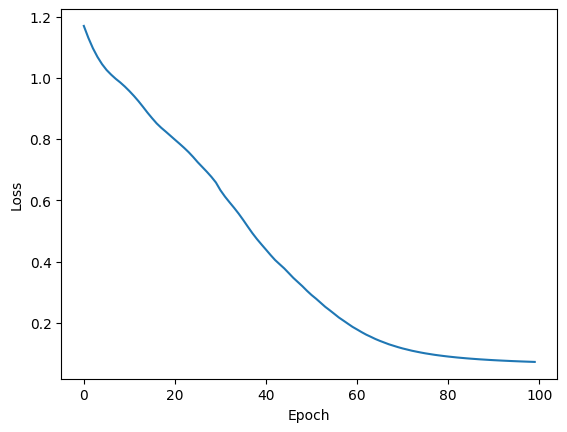

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [15]:
 # Evaluate Model on a test dataset
with torch.no_grad():  # turn off backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test) # Find the loss

In [16]:
loss

tensor(0.0538)

In [17]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network think it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1
2.) tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
3.) tensor([  6.5957,   1.5027, -10.4091]) 	 0 	 0
4.) tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1
5.) tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2
6.) tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2
7.) tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
8.) tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
9.) tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1
10.) tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11.) tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1
12.) tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2
13.) tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1
14.) tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1
15.) tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2
16.) tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2
17.) tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1
18.) tensor([-6.7608,  2.7754,  4.5281]) 	 2 	 2
19.) tensor([-1.7048,  4.1980, -1.4670]) 	 1 	 1
20.) tensor([  7.7757,   1.3740, -11.8864]) 	 0 	 0
21.) tensor

In [18]:
# Inserting new data and train a model on it
new_iris = torch.tensor([4.5, 2.3, 1.3, 0.3])
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

  # Which item has the biggest it tells us which type of flower it is (because of argmax()) in our case it is the first item so our answer is 0 => Setosa

tensor([ 5.2740,  1.5047, -8.6078])
0


In [19]:
# Save our nn model
torch.save(model.state_dict(), 'iris_model.pt')

In [20]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-20-5cdeecb78af9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [21]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)